# Casos COVID-2019
___
Analise feito com base nos dados da Secretaria de Saúde de Minas Gerais: 
[Dados CSV](https://www.saude.mg.gov.br/coronavirus/painel)

Lista de Tarefas:

- [x] Casos em MG
- [ ] Aperfeiçoar o grafico de Casos
- [ ] Numero de obitos  
- [ ] Casos por Sexo
- [ ] Casos por Faixa Etaria

### Importando Módulos

In [10]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

### Casos em Minas Gerais 

In [11]:
df = pd.read_csv('DataSets/covid-19.csv',sep = ',',encoding='ISO-8859-1')

In [12]:
df_casos = df.filter(items = ['DATA_NOTIFICACAO','CLASSIFICACAO_CASO'])
df_casos = df_casos[df_casos['CLASSIFICACAO_CASO'] == 'Caso Confirmado']

In [13]:
index = np.arange(0,len(df_casos),1)
df_casos = df_casos.set_index(index)

In [14]:
df_casos['CONTADOR'] = 1

In [15]:
df_casos = df_casos.filter(items = ['DATA_NOTIFICACAO','CONTADOR']).groupby('DATA_NOTIFICACAO',as_index = False).sum()

In [16]:
df_casos['CASOS_ACUMULADOS'] = 0

for i in range(len(df_casos)):
    if i == 0:
        df_casos.loc[i,'CASOS_ACUMULADOS'] = df_casos.loc[i,'CONTADOR']
    else:
        df_casos.loc[i,'CASOS_ACUMULADOS'] = df_casos.loc[i,'CONTADOR'] + df_casos.loc[i - 1,'CASOS_ACUMULADOS']

#### Exemplo a se fazer com o grafico

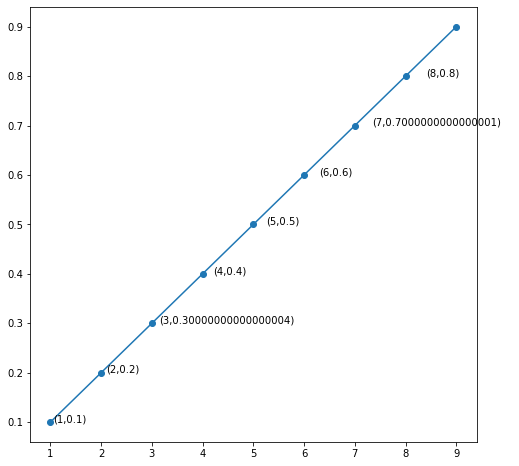

In [17]:
fig, ax = plt.subplots(figsize = (8,8))
x = np.arange(1,10,1)
y = np.arange(0.1,1,0.1)
plt.plot(x,y,marker = 'o')
for x1,y1 in zip(x,y):
    ax.annotate('({},{})'.format(x1,y1),xy = (x1 * 1.05,y1))


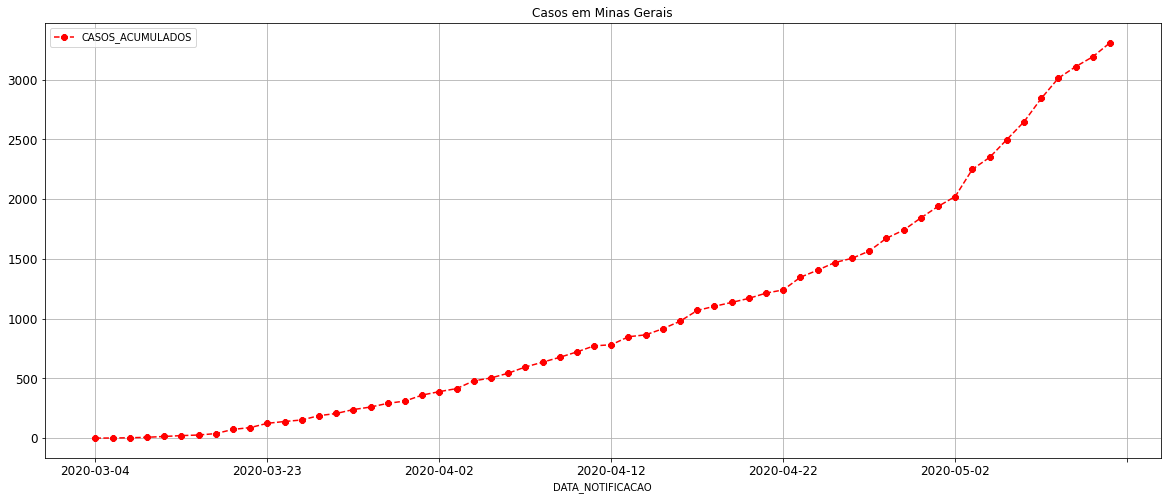

In [34]:
cases_f,casos = plt.subplots()

df_casos.plot(style='8--',x = 'DATA_NOTIFICACAO',y = 'CASOS_ACUMULADOS',figsize = (20,8),color = 'red',grid = True,title = 'Casos em Minas Gerais',fontsize = 12,ax = casos)


In [19]:
df_casos.dtypes

DATA_NOTIFICACAO    object
CONTADOR             int64
CASOS_ACUMULADOS     int64
dtype: object

In [20]:
df_teste = df_casos

In [25]:
for x1 in df_casos.CASOS_ACUMULADOS:
    if(x1 % 5 == 0):
        print(x1)

15
125
140
240
390
415
480
865
1170
1470
1505
2250
